# Suicide Rates Overview 1985 to 2016

Dataset containing data for suicide numbers for countries and dozen different factors.

Goal is to look for and find any correlations with the suicide rates/cases and different factors.
Like age, country, GDP and gender.
- **Find what type of person has a higher likely hood of suicide and who has least likely hood**

Some of the points to check
1. Trends for suicide rates globaly over time.
2. Trends for suicide rates for different demographics, such as gender, age, generation etc..
3. Trends for countries
4. Trends for economics
5. Trends for 

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("SuicideRates.csv", dtype={
    "year": int, "sex": "category", "age": "category", 
    "suicides_no": int, "population": int, "suicides/100k pop": float, 
    "country-year": str, "HDI for year": float, "gdp_for_year ($)": float, 
    "gdp_per_capita ($)": int, "generation": "category"
    })
df.dtypes

country                 object
year                     int32
sex                   category
age                   category
suicides_no              int32
population               int32
suicides/100k pop      float64
country-year            object
HDI for year           float64
 gdp_for_year ($)       object
gdp_per_capita ($)       int32
generation            category
dtype: object

In [175]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicate rows
print(f"Duplicate rows:", df.duplicated().sum())

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64
Duplicate rows: 0


In [176]:
# Check unique values in the "gender" column
print(df["sex"].unique())

# Check unique values in the "country" column
print(df["country"].unique())

['male', 'female']
Categories (2, object): ['female', 'male']
['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'S

In [177]:
# Remove "years" text part from the 'age' column
df['age'] = df['age'].str.replace(' years', '')

# Extract lower and upper limits of age range from the 'age' column
df[['age_lower', 'age_upper']] = df['age'].str.split('-', expand=True)

# Leave the upper limit as None and not fill it to avoid introducing bias

df['age_lower'] = df['age_lower'].str.replace('+', '')

# Convert 'age_lower' column to int
df['age_lower'] = df['age_lower'].astype(int)
df['age_upper'] = df['age_upper'].astype(float)

df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,age_lower,age_upper
0,Albania,1987,male,15-24,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,15,24.0
1,Albania,1987,male,35-54,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,35,54.0
2,Albania,1987,female,15-24,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,15,24.0
3,Albania,1987,male,75+,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,75,NaN
4,Albania,1987,male,25-34,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,25,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,35,54.0
27816,Uzbekistan,2014,female,75+,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,75,NaN
27817,Uzbekistan,2014,male,5-14,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,5,14.0
27818,Uzbekistan,2014,female,5-14,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,5,14.0


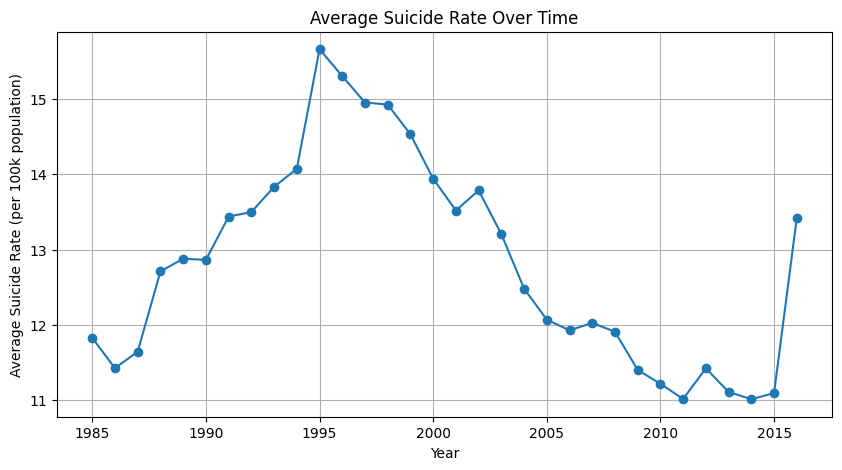

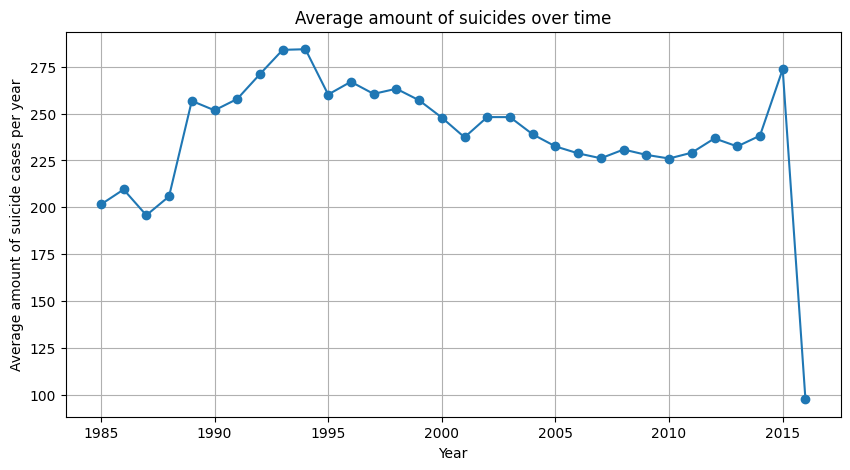

In [178]:
# 1. Trends for suicide rates globaly over time.

# Average suicide rates globaly for each year
average_suicide_rate = df.groupby("year")["suicides/100k pop"].mean()

# Plot the average suicide rate over time
plt.figure(figsize=(10, 5))
plt.plot(average_suicide_rate.index, average_suicide_rate.values, marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Average Suicide Rate (per 100k population)")
plt.title("Average Suicide Rate Over Time")
plt.grid(True)

# Average amount of suicides globaly yearly
average_suicide_amount = df.groupby("year")["suicides_no"].mean()

# Plot the average amount of suicide cases yearly over time
plt.figure(figsize=(10,5))
plt.plot(average_suicide_amount.index, average_suicide_amount.values, marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Average amount of suicide cases per year")
plt.title("Average amount of suicides over time")
plt.grid(True)

**Suicide rates and cases globaly over time trends**

We can observe from the data given that thre was a very significant rise in suicide rates from the years 1987 to 1995 where the rate peaked.
From just this data the cause is unknown.
After 1995 all the way till 2015 the suicide rates globaly had a steady decrese and fell back to a level even lower than the previous trough(lowest point).
From the data we have we can draw a general conclusion that the suicide rates globaly seem to down ward trend overtime with some increases in between.

- temp

C:\Users\matti\AppData\Local\Temp\ipykernel_5256\3413909874.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_suicide_rates = df.groupby("sex")[["suicides/100k pop"]].mean()


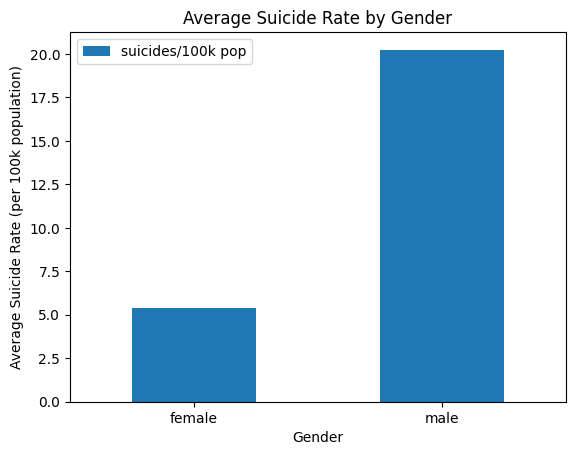

C:\Users\matti\AppData\Local\Temp\ipykernel_5256\3413909874.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_suicide_rates = df.groupby("age")["suicides/100k pop"].mean()


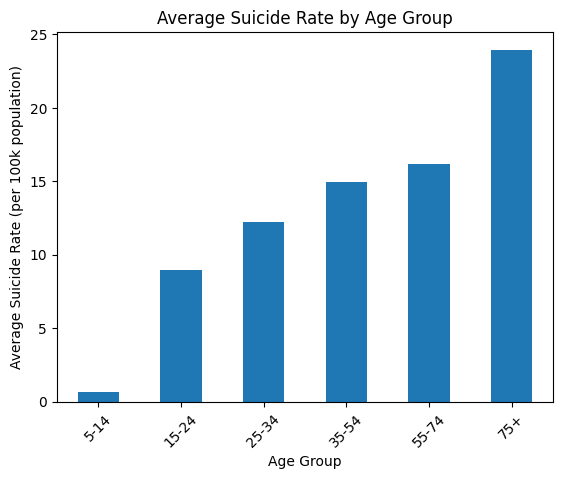

C:\Users\matti\AppData\Local\Temp\ipykernel_5256\3413909874.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generation_suicide_rates = df.groupby("generation")["suicides/100k pop"].mean()


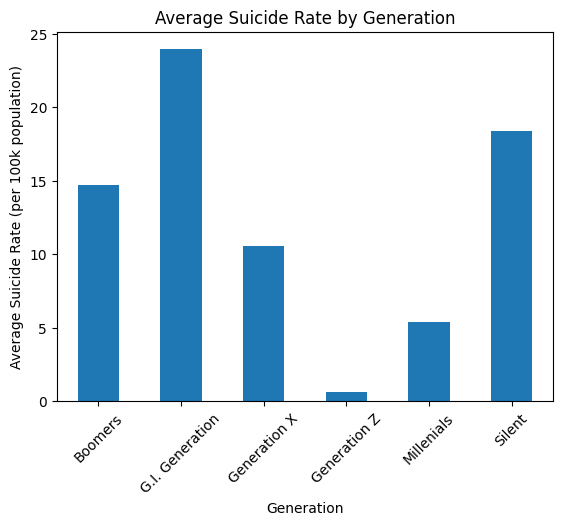

In [179]:
# 2. Trends for suicide rates for different demographics, such as gender, age, generation etc..

# Create bar charts showing the suicide rates broken down by sex
sex_suicide_rates = df.groupby("sex")[["suicides/100k pop"]].mean()
#sex_suicide_amount = df.groupby("sex")[["suicides_no"]].mean()

sex_suicide_rates.plot(kind="bar", rot=0)
plt.xlabel("Gender")
plt.ylabel("Average Suicide Rate (per 100k population)")
plt.title("Average Suicide Rate by Gender")
plt.show()


# Convert 'age' column to categorical data type with custom sorting based on the lower limit
age_categories = ['5-14', '15-24', '25-34', '35-54', '55-74', '75+']
df['age'] = pd.Categorical(df['age'], categories=age_categories, ordered=True)

# Group by 'age' and calculate the mean suicide rate
age_group_suicide_rates = df.groupby("age")["suicides/100k pop"].mean()

# Sort age groups based on the custom categorical order
age_group_suicide_amount_sorted = age_group_suicide_rates.sort_index()


age_group_suicide_amount_sorted.plot(kind="bar", rot=45)
plt.xlabel("Age Group")
plt.ylabel("Average Suicide Rate (per 100k population)")
plt.title("Average Suicide Rate by Age Group")
plt.show()

# Calculate the suicide rate for each generation and plot it on a bar chart
generation_suicide_rates = df.groupby("generation")["suicides/100k pop"].mean()
generation_suicide_rates.plot(kind="bar", rot=45)
plt.xlabel("Generation")
plt.ylabel("Average Suicide Rate (per 100k population)")
plt.title("Average Suicide Rate by Generation")
plt.show()

**Suicide rates and cases for different demographics globaly**

C:\Users\matti\AppData\Local\Temp\ipykernel_5256\3941565807.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_suicide_amount = df.groupby("sex")[["suicides_no"]].mean()


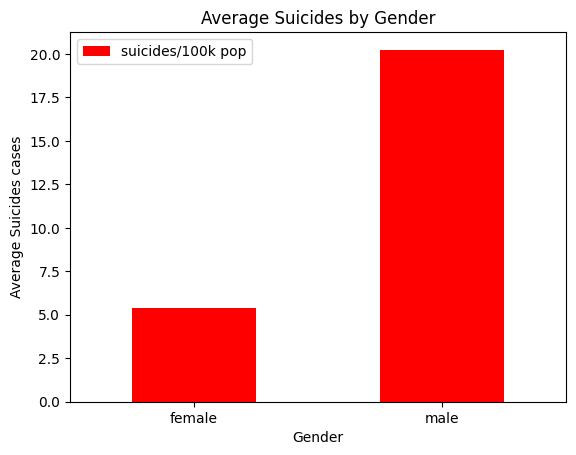

C:\Users\matti\AppData\Local\Temp\ipykernel_5256\3941565807.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_suicide_amount = df.groupby("age")["suicides_no"].mean()


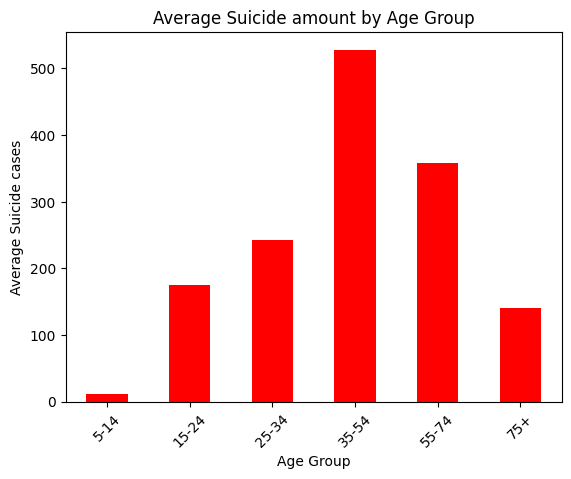

C:\Users\matti\AppData\Local\Temp\ipykernel_5256\3941565807.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generation_suicide_rates = df.groupby("generation")["suicides_no"].mean()


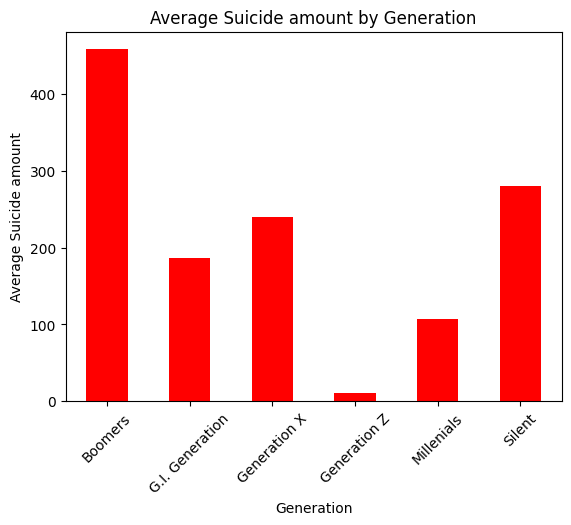

In [182]:
# 2. Trends for suicide rates for different demographics, such as gender, age, generation etc..

# Create bar charts showing the suicide rates broken down by sex
sex_suicide_amount = df.groupby("sex")[["suicides_no"]].mean()

sex_suicide_amount.plot(kind="bar", rot=0, color="r")
plt.xlabel("Gender")
plt.ylabel("Average Suicides cases")
plt.title("Average Suicides by Gender")
plt.show()


# Convert 'age' column to categorical data type with custom sorting based on the lower limit
#age_categories = ['5-14', '15-24', '25-34', '35-54', '55-74', '75+']
df['age'] = pd.Categorical(df['age'], categories=age_categories, ordered=True)

# Group by 'age' and calculate the mean suicide rate
age_group_suicide_amount = df.groupby("age")["suicides_no"].mean()

# Sort age groups based on the custom categorical order
age_group_suicide_amount_sorted = age_group_suicide_amount.sort_index()


age_group_suicide_amount_sorted.plot(kind="bar", rot=45, color="r")
plt.xlabel("Age Group")
plt.ylabel("Average Suicide cases")
plt.title("Average Suicide amount by Age Group")
plt.show()

# Calculate the suicide rate for each generation and plot it on a bar chart
generation_suicide_rates = df.groupby("generation")["suicides_no"].mean()
generation_suicide_rates.plot(kind="bar", rot=45, color="r")
plt.xlabel("Generation")
plt.ylabel("Average Suicide amount")
plt.title("Average Suicide amount by Generation")
plt.show()

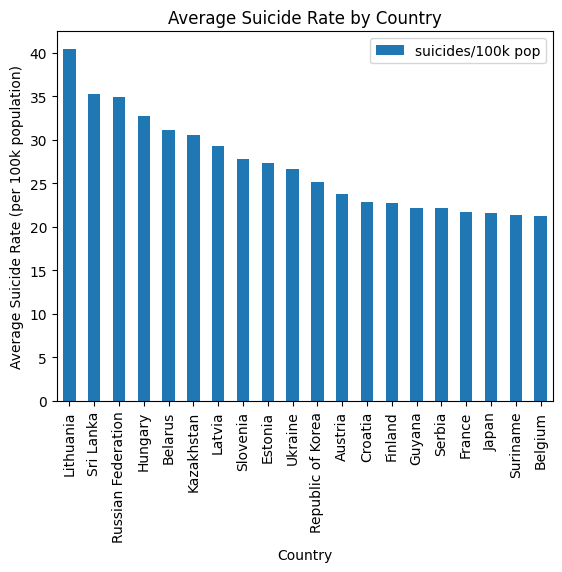

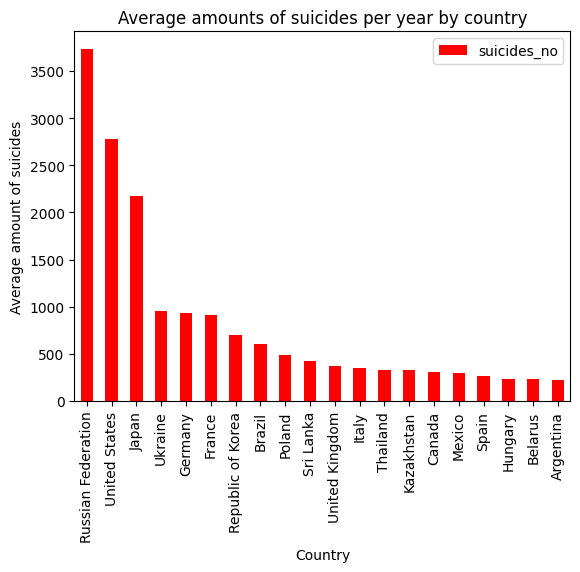

In [181]:
df_by_country = df.groupby(["country"])[["suicides/100k pop"]].mean()
df_by_country_sorted = df_by_country.sort_values(by="suicides/100k pop", ascending=False).head(20)

df_by_country_sorted.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Average Suicide Rate (per 100k population)")
plt.title("Average Suicide Rate by Country")
plt.show()

df_amount_by_country = df.groupby(["country"])[["suicides_no"]].mean()
sorted_amount_country = df_amount_by_country.sort_values(by="suicides_no", ascending=False).head(20)

sorted_amount_country.plot(kind="bar", color="r")
plt.xlabel("Country")
plt.ylabel("Average amount of suicides")
plt.title("Average amounts of suicides per year by country")
plt.show()